# Loading data and visualizing the corpus

In this Notebook, we will load the data from Delpher into a machine-readable format. Furthermore, we will perform some data visualizations of the dataset. We will see that, even with a few lines of code, we can create some pretty useful visualizations. These graphs can give us information about the content of the dataset, its distribution across different papers, and possible parts where the dataset is incomplete.

## Dataset

For this tutorial, we have selected a dataset from [Delpher](https://www.delpher.nl/). The datasets consists of all issues of 3 different newspapers that were published in the year 1873:
- Het Vaderland
- De Standaard
- De Tijd

These newspapers represent different political pillars, so it can be interesting to investigate how these pillars affect a paper's reporting on a particular news event. 

## Load the data

First, we need to load the data into the Notebook. We do this by using [Pandas](https://pandas.pydata.org/), which is a powerfool and widely used tool for data analysis in Python.

### Import Pandas into the notebook

In [1]:
import pandas as pd

### Store a corpus into a Pandas DataFrame

A Pandas `DataFrame` is a 2-dimensional data structure, like a table.
Let's store some data into Pandas DataFrames.

With the `describe()` method, we can get summary statistics for each column in our DataFrame.

In [2]:
vaderland = pd.read_csv("data/HetVaderland_1873.csv", index_col=0, delimiter=',', encoding='utf-8', quotechar='"', quoting=0)

In [3]:
standaard = pd.read_csv("data/DeStandaard_1873.csv", index_col = 0, delimiter=',', encoding='utf-8', quotechar='"', quoting=0)

In [4]:
tijd = pd.read_csv("data/DeTijd_1873.csv", index_col = 0, delimiter=',', encoding='utf-8', quotechar='"', quoting=0)

#### Describe corpus 'vaderland'

Try to anwer these questions:
* How many unique paper identifiers does the corpus have?
* What is the type of all papers in the corpus?
* What date-value is most common?
* How many times does this value occur in the corpus?

In [5]:
vaderland.describe()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied
count,7280,7280,7280,7280,7280,7280,7280,7280
unique,7277,309,1,1804,309,7251,1,1
top,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396045:mpeg21,artikel,BUITENLAND.,1873/02/21 00:00:00,Beleening . . . | Prolongatie ... 5,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk
freq,4,44,7280,304,44,8,7280,7280


#### inspect DataFrame 'standaard'

Try to inspect it yourself with the example above. First create a new Code cell below this one.

#### inspect DataFrame 'tijd'

Try to inspect it yourself with the example above. First create a new Code cell below this one.

### Combine the datasets into one big DataFrame

In [6]:
data = pd.concat([vaderland, standaard, tijd])

### Add month and day to dataset

In many datasets, dates are stored as strings that aren't directly interpretable as dates by Pandas.
This can potentially cause issues when performing date-based operations such as sorting chronologically.
To address this problem, we convert the date field to a proper datetime object with the `to_datetime` method.

We will then extract the month and day from the date. Here is how we do this.

In [7]:
data.dtypes

identifier             object
oaiIdentifier          object
type                   object
title                  object
date                   object
content                object
krantnaam              object
verspreidingsgebied    object
dtype: object

In [8]:
data["date"] = pd.to_datetime(data["date"])

In [9]:
data['month'] = data['date'].dt.strftime("%B")
data['day'] = data['date'].dt.strftime("%A")

In [10]:
data.head(2)

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day
0,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,Ontwerp van wet tot wijziging der wetten betre...,1873-04-25,"’s Graven hage, 24 April.! m- Om de re^e&eu, i...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,April,Friday
1,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,De strijd tegen den Nederlandschen Sigarenmake...,1873-04-25,11. De positie der sigarenmakers in Nederland ...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,April,Friday


We have now added the month and day on which an article was published in separate columns. For future purposes, it is convenient to sort the DataFrame by date.

In [11]:
data = data.sort_values(by='date')
data.head(2)

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day
13792,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,RIVIKR-VA.A.B-',1873-01-01,"&M.STERDAM 31 December, ü ding n_ar: Tot Mannh...",De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday
13747,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,?sfde van den feestdag:,1873-01-01,?sfde van den feestdag: 'ESIIIJI.EIIIS O. 11.»...,De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday


As you can see, the first rows of the DataFrame now contain the articles from January 1st. 

## Visualise the data

Pandas has plotting functionality built-in.

### Unique number of newspapers

In [12]:
unique_newspapers = data.groupby('krantnaam')['oaiIdentifier'].nunique()
df_unique_newspapers = unique_newspapers.to_frame(name='unique_value')
df_unique_newspapers

,unique_value
krantnaam,
De TÄ³d : godsdienstig-staatkundig dagblad,1
De Tĳd : godsdienstig-staatkundig dagblad,301
De standaard,307
Het vaderland : staat- en letterkundig nieuwsblad,309


We notice that there is 1 article with the assigned newspaper title 'De TÄ³d : godsdienstig-staatkundig dagblad'. This is a typo, and we want to add this instance to the list of articles from De Tijd.

In [13]:
data.loc[data['krantnaam'] == 'De TÄ³d : godsdienstig-staatkundig dagblad', 'krantnaam'] = 'De Tĳd : godsdienstig-staatkundig dagblad'

unique_newspapers = data.groupby('krantnaam')['oaiIdentifier'].nunique()
df_unique_newspapers = unique_newspapers.to_frame(name='unique_value')
df_unique_newspapers

,unique_value
krantnaam,
De Tĳd : godsdienstig-staatkundig dagblad,302
De standaard,307
Het vaderland : staat- en letterkundig nieuwsblad,309


<Axes: title={'center': 'Unique number of newspaper issues in 1873 (in Delpher)'}, ylabel='krantnaam'>

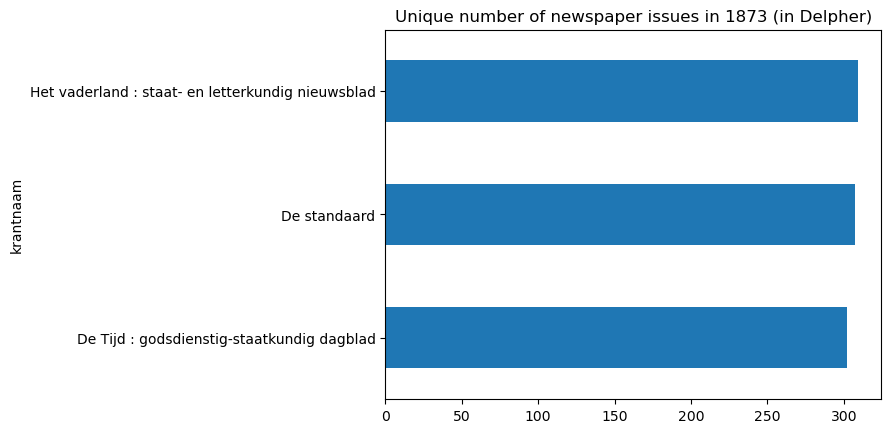

In [14]:
unique_newspapers.plot(kind = 'barh', title = "Unique number of newspaper issues in 1873 (in Delpher)")

## Creating plots with matplotlib

We can also use the matplotlib library for creating plots. It has more possibilities. 

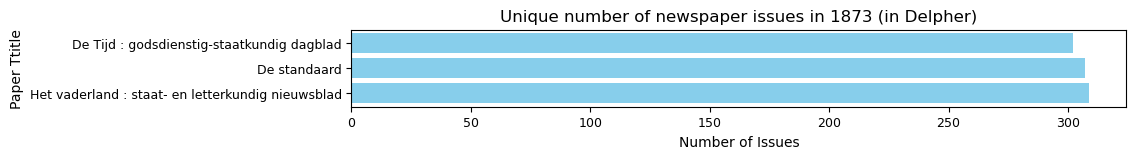

In [15]:
import matplotlib.pyplot as plt

# Sample data for unique_newspapers

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 1))
plt.barh(unique_newspapers.index, unique_newspapers, color='skyblue')
plt.xlabel('Number of Issues')
plt.ylabel('Paper Ttitle')
plt.title('Unique number of newspaper issues in 1873 (in Delpher)')
plt.xticks(fontsize=9)  # x-axis tick labels to 9 points
plt.yticks(fontsize=9)  # y-axis tick labels to 9 points
plt.gca().invert_yaxis()  # Invert y-axis to match the typical orientation
plt.show()


We now have a pretty good visualization of the distribution of newspapers in the corpus. Of course, there are more possibilities when it comes to visualizing the basic information of a corpus. Let's see how we can create a pie chart. 

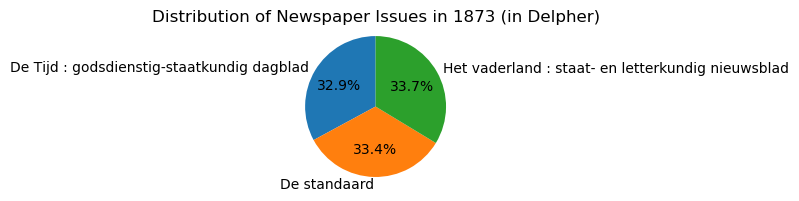

In [16]:
import matplotlib.pyplot as plt

# Plotting the pie chart
plt.figure(figsize=(2,2))
plt.pie(unique_newspapers, labels=unique_newspapers.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Newspaper Issues in 1873 (in Delpher)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Number of articles per newspaper

The articles are identified by the 'identifier' column of the DataFrame.

Next, let's look at the distribution of articles per newspaper. With a simple bar plot, we can visualize the total number of articles for each newspaper. 

In [17]:
unique_articles = data.groupby('krantnaam')['identifier'].nunique()

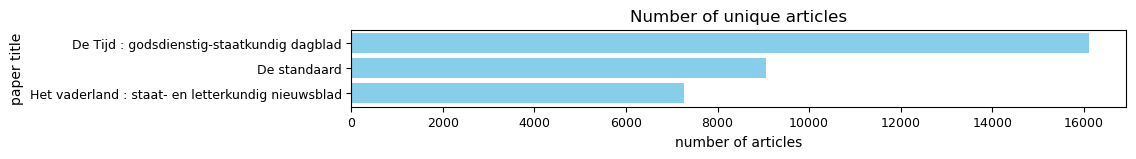

In [18]:
import matplotlib.pyplot as plt

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 1))
plt.barh(unique_articles.index, unique_articles, color='skyblue')
plt.xlabel('number of articles')
plt.ylabel('paper title')
plt.title('Number of unique articles')
plt.xticks(fontsize=9)  # x-axis tick labels to 9 points
plt.yticks(fontsize=9)  # y-axis tick labels to 9 points
plt.gca().invert_yaxis()  # Invert y-axis to match the typical orientation
plt.show()

We see that, in terms of the number of articles, our dataset is imbalanced. While the number of newspaper issues is evenly distibuted accross the different newspapers, there are significantly more articles from De Tijd. One explanation could be that De Tijd contains more shorter articles than the other newspapers.  

### Number of unique newspaper issues per month

What about the distribution of newspapers over different months? This information can help you find gaps in your datasets.

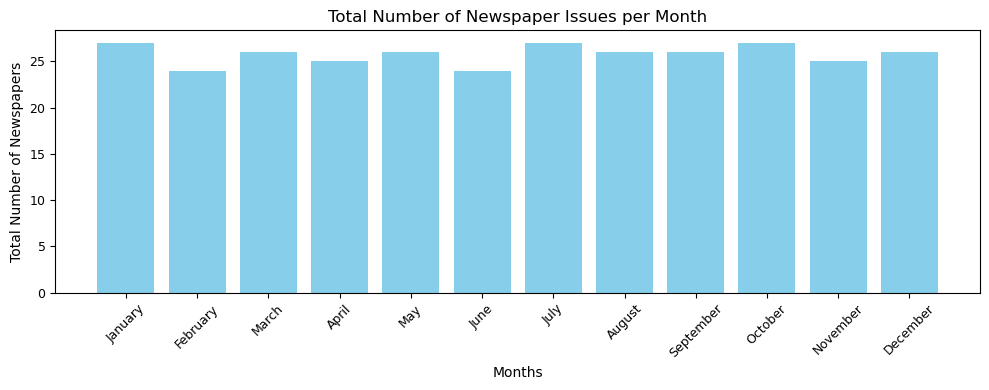

In [19]:
import matplotlib.pyplot as plt

# Step 1: Filter the data for krantnaam == 'Het vaderland'
filtered_data = data[data['krantnaam'] == 'Het vaderland : staat- en letterkundig nieuwsblad']

# Step 2: Group by month and count unique oaiIdentifier (which is a paper issue identifier)
month_values = filtered_data.groupby('month')['oaiIdentifier'].nunique()

# Step 3: Sort months chronologically
# Reindex to put months in the correct order
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
month_values = month_values.reindex(months, fill_value=0)  # Fill missing days with 0

# Step 4: Plotting the vertical bar chart
plt.figure(figsize=(10, 4))
plt.bar(month_values.index, month_values, color='skyblue')
plt.xlabel('Months')
plt.ylabel('Total Number of Newspapers')
plt.title('Total Number of Newspaper Issues per Month')
plt.xticks(fontsize=9, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=9)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### try yourself

Can you plot the distribution for the other two papers?

Adjust the code below to plot the histogram for the other two newspapers.

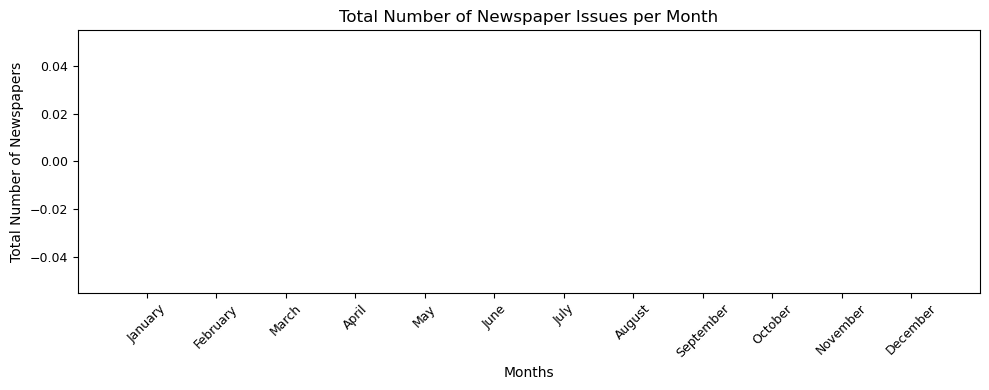

In [20]:
import matplotlib.pyplot as plt

# Step 1: Filter the data for krantnaam == '<krantnaam>'
filtered_data = data[data['krantnaam'] == '<krantnaam>']

# Step 2: Group by month and count unique oaiIdentifier (which is a paper issue identifier)
month_values = filtered_data.groupby('month')['oaiIdentifier'].nunique()

# Step 3: Sort months chronologically
# Reindex to put months in the correct order
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
month_values = month_values.reindex(months, fill_value=0)  # Fill missing days with 0

# Step 4: Plotting the vertical bar chart
plt.figure(figsize=(10, 4))
plt.bar(month_values.index, month_values, color='skyblue')
plt.xlabel('Months')
plt.ylabel('Total Number of Newspapers')
plt.title('Total Number of Newspaper Issues per Month')
plt.xticks(fontsize=9, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=9)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Days on which the newspaper were published

Now let's take a look at the days on which the newspapers in the corpus were published. Does one day stand out, either because the bars peak or drop on that day?

In [21]:
weekday_values = data.groupby(['day'])['oaiIdentifier'].nunique()
weekday_values

day
Friday       150
Monday       153
Saturday     154
Thursday     153
Tuesday      151
Wednesday    157
Name: oaiIdentifier, dtype: int64

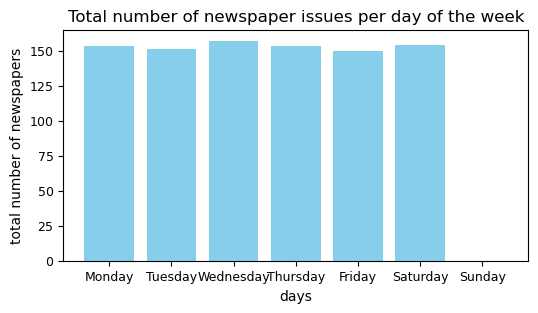

In [22]:
import matplotlib.pyplot as plt

# Reindex to include all days of the week in the correct order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_values = weekday_values.reindex(days_of_week, fill_value=0)  # Fill missing days with 0

# Plotting the vertical bar chart
plt.figure(figsize=(6, 3))
plt.bar(weekday_values.index, weekday_values, color='skyblue')
plt.xlabel('days')
plt.ylabel('total number of newspapers')
plt.title('Total number of newspaper issues per day of the week')
plt.xticks(fontsize=9)  # x-axis tick labels size
plt.yticks(fontsize=9)  # y-axis tick labels size
plt.show()

We can see that the newspaper issues are evenly distributed over the days of the week. This generally is good news!